In [67]:
import struct
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#load data 
def loadData(file_name):
    data = None
    with gzip.open(file_name, 'rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
    
        if "images" in file_name:
            nrows, ncols = struct.unpack(">II", f.read(8))
            data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
            #data = data.reshape((size, nrows, ncols))
            data = data.reshape((size, nrows * ncols))
        else:
            data = np.frombuffer(f.read(), dtype=np.dtype(np.uint8).newbyteorder('>'))
            data = data.reshape((size,))
    
    return data

In [69]:
#training and testing data
train_x = loadData("downloads/mnist/train-images-idx3-ubyte.gz")
train_y = loadData("downloads/mnist/train-labels-idx1-ubyte.gz")
test_x = loadData("downloads/mnist/t10k-images-idx3-ubyte.gz")
test_y = loadData("downloads/mnist/t10k-labels-idx1-ubyte.gz")

print("Train images shape: ")
print(train_x.shape)

print("Train labels shape: ")
print(train_y.shape)

print("Test images shape: ")
print(test_x.shape)

print("Test labels shape: ")
print(test_y.shape)

Train images shape: 
(60000, 784)
Train labels shape: 
(60000,)
Test images shape: 
(10000, 784)
Test labels shape: 
(10000,)


<h1>Naive Bayes<h1>

In [70]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [71]:
bnb_model = bnb.fit(train_x, train_y)

In [91]:
predictiontest = bnb_model.predict(test_x)
predictiontrain = bnb_model.predict(train_x)

In [92]:
from sklearn.metrics import confusion_matrix
con_matrix_test = confusion_matrix(test_y, predictiontest)
con_matrix_train = confusion_matrix(train_y, predictiontrain)
print("Confusion Matrix of Naive Bayes Test")
print(con_matrix_test)
print()
print("Confusion Matrix of Naive Bayes Train")
print(con_matrix_train)

Confusion Matrix of Naive Bayes Test
[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]

Confusion Matrix of Naive Bayes Train
[[5273    3   26   38   16  283  114    0  161    9]
 [   0 6457   59   16    4   70   26    4   90   16]
 [  93   86 4913  149  128   19  232   60  261   17]
 [  56  138  275 4871   19  148   54   74  309  187]
 [  13   52   38    0 4693   29   89   28  124  776]
 [ 158   72   53  805  161 3763  118   23  108  160]
 [  60  158  119    2   47  170 5318    0   42    2]
 [  26  133   47   18 

In [93]:
score = gnb_model.score(test_x,test_y)
print("Score of Naive Bayes:")
print(score)

Score of Naive Bayes:
0.8413


In [94]:
from sklearn.metrics import accuracy_score
print("Accuracy of Naive Bayes:  {} %".format(accuracy_score(test_y, predictiontest)*100))

Accuracy of Naive Bayes:  84.13000000000001 %


Visual Representation of Naive Bayes's Confusion Matrix Test:


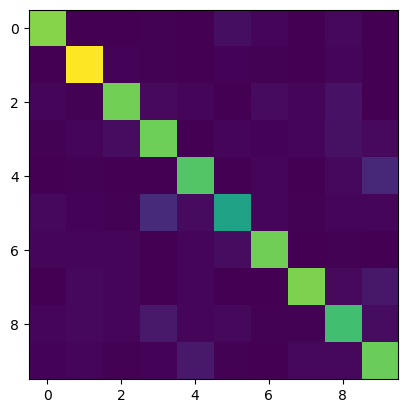

In [77]:
print("Visual Representation of Naive Bayes's Confusion Matrix Test:")
plt.imshow(con_matrix_test)

Visual Representation of Naive Bayes's Confusion Matrix Train:


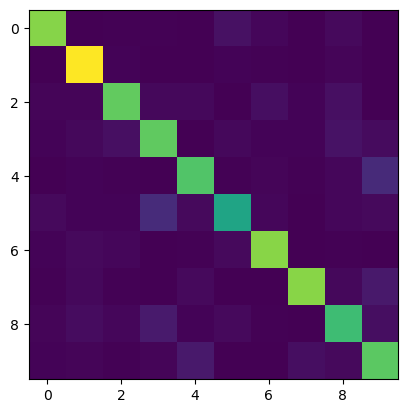

In [78]:
print("Visual Representation of Naive Bayes's Confusion Matrix Train:")
plt.imshow(con_matrix_train)

Prediction: 


7

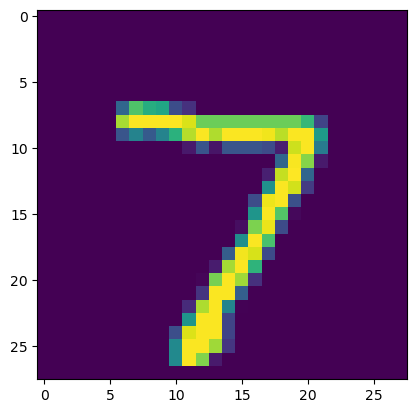

In [79]:
#Analysis of Confusion Matrix
index = 0
plt.imshow(np.reshape(test_x[index],(28,28)))
print("Prediction: ")
gnb_model.predict([test_x[index]])[0]

Prediction: 


4

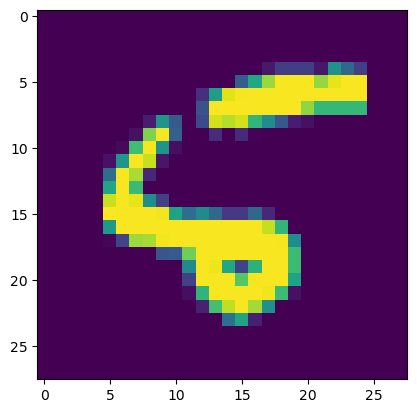

In [80]:
#Analysis of Confusion Matrix
index = 8
plt.imshow(np.reshape(test_x[index],(28,28)))
print("Prediction: ")
gnb_model.predict([test_x[index]])[0]

<h1>Logistic Regression<h1>

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression(
    penalty="l2",  
    class_weight=None,
    random_state=0,
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=500)

In [83]:
reg_model = lr.fit(train_x,train_y)

/Users/tanvimurke/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
predictiontest = reg_model.predict(test_x)
predictiontrain = reg_model.predict(train_x)

In [96]:
con_matrix_test = confusion_matrix(test_y, predictiontest)
print("Confusion Matrix of Logistic Regression Test")
print(con_matrix_test)
print()
con_matrix_train = confusion_matrix(train_y, predictiontrain)
print("Confusion Matrix of Logistic Regression Train")
print(con_matrix_train)

Confusion Matrix of Logistic Regression Test
[[ 954    0    1    4    1    7    7    2    4    0]
 [   0 1112    8    2    0    1    3    1    8    0]
 [   3   12  919   18   12    6   12    9   37    4]
 [   4    2   17  923    2   24    2    9   20    7]
 [   2    3    5    4  918    0   10    5    9   26]
 [  12    4    4   35   10  762   16    8   35    6]
 [  10    3    7    2    6   17  907    1    4    1]
 [   4    7   24   10    5    1    0  943    2   32]
 [   7   13    6   23    7   21    6   13  867   11]
 [   8    6    2   11   25    3    0   22   13  919]]

Confusion Matrix of Logistic Regression Train
[[5796    0   15    8   10   20   25    4   39    6]
 [   1 6607   27   18    5   12    2   11   46   13]
 [  17   41 5502   90   53   21   42   52  120   20]
 [  19   17  110 5625    6  149   16   41  103   45]
 [   8   22   24    7 5528    8   36   17   35  157]
 [  39   16   36  154   46 4867   70   10  148   35]
 [  26    9   33    3   26   52 5737    2   29    1]
 [   7

In [97]:
score = reg_model.score(test_x,test_y)
print("Score of Logistic Regression:")
print(score)

Score of Logistic Regression:
0.9224


In [98]:
print("Accuracy of Logistic Regression: {} %".format(accuracy_score(test_y, predictiontest)*100))

Accuracy of Logistic Regression: 92.24 %


Visual Representation of Logistic Regression's Confusion Matrix Test:


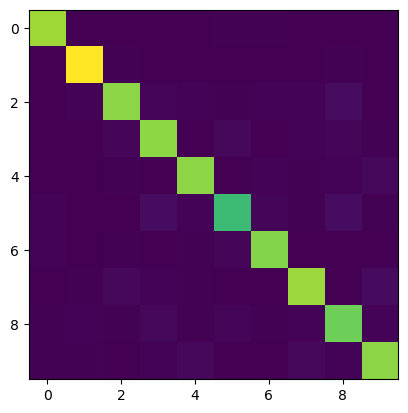

In [99]:
print("Visual Representation of Logistic Regression's Confusion Matrix Test:")
plt.imshow(con_matrix_test)


Visual Representation of Logistic Regression's Confusion Matrix Train:


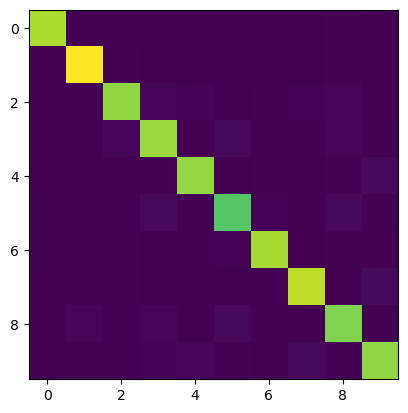

In [100]:
print("Visual Representation of Logistic Regression's Confusion Matrix Train:")
plt.imshow(con_matrix_train)

Prediction: 


7

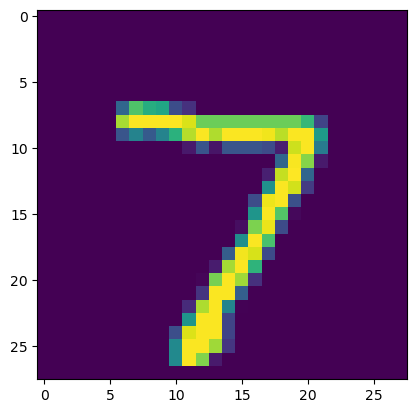

In [101]:
#Analysis of Confusion Matrix
index = 0
plt.imshow(np.reshape(test_x[index],(28,28)))
print("Prediction: ")
reg_model.predict([test_x[index]])[0]

Prediction: 


6

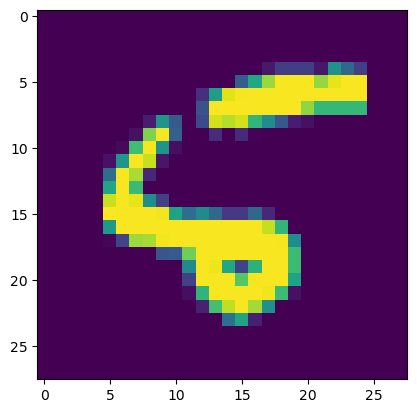

In [102]:
#Analysis of Confusion Matrix
index = 8
plt.imshow(np.reshape(test_x[index],(28,28)))
print("Prediction: ")
reg_model.predict([test_x[index]])[0]

In [104]:
import pickle

with open("Downloads/nb.model.pkl", "wb") as file:
    pickle.dump(bnb_model, file)
    
with open("Downloads/lr.model.pkl", "wb") as file:
    pickle.dump(reg_model, file)    